In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
data = pd.read_csv('train.csv')
data['sub_category'].fillna('Unknown',inplace=True)
data['crimeaditionalinfo'].fillna('No additional info',inplace=True)

<ipython-input-2-72661bc8582b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['sub_category'].fillna('Unknown',inplace=True)
<ipython-input-2-72661bc8582b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

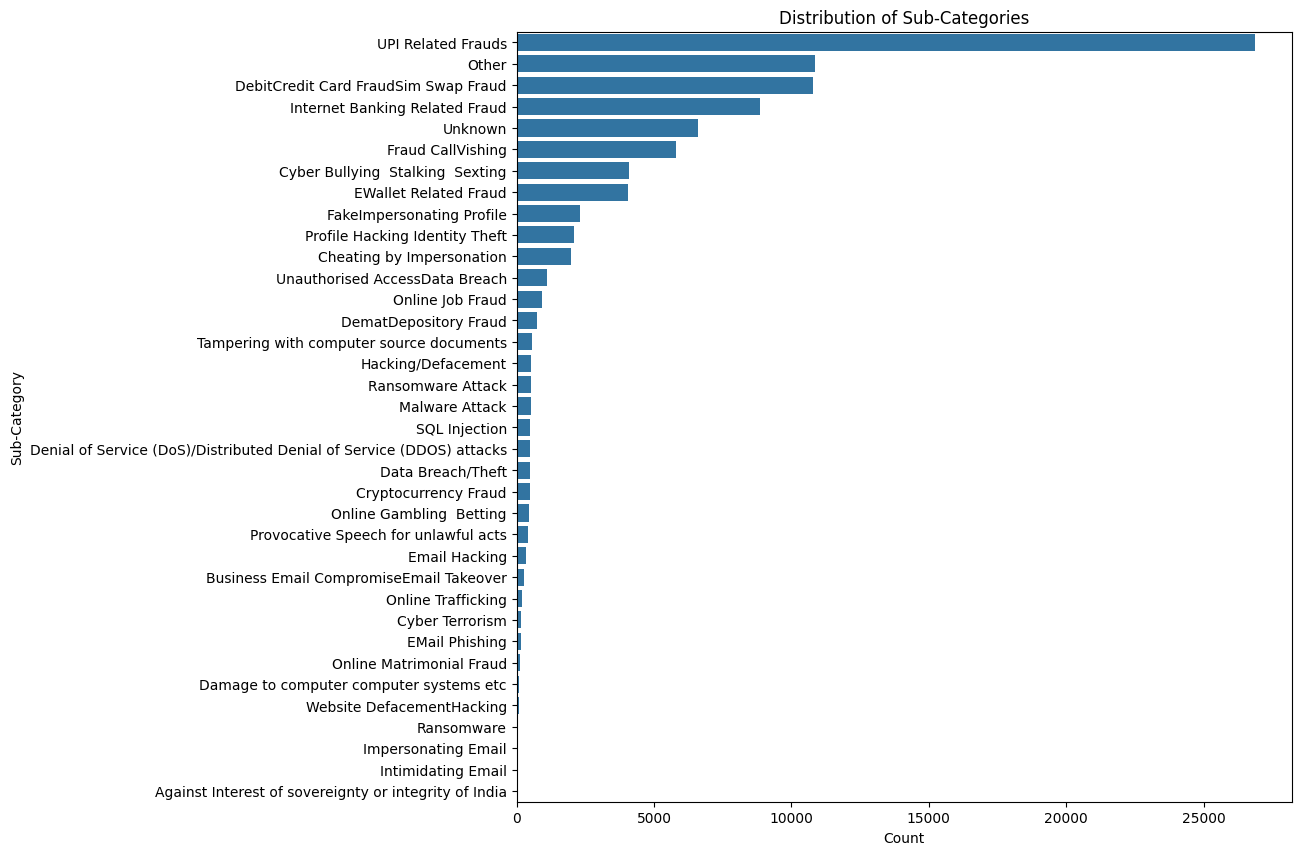

In [4]:
plt.figure(figsize=(10,10))
sns.countplot(y='sub_category', data=data, order=data['sub_category'].value_counts().index)
plt.title('Distribution of Sub-Categories')
plt.xlabel('Count')
plt.ylabel('Sub-Category')
plt.show()

In [5]:
text = " ".join(info for info in data['crimeaditionalinfo'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

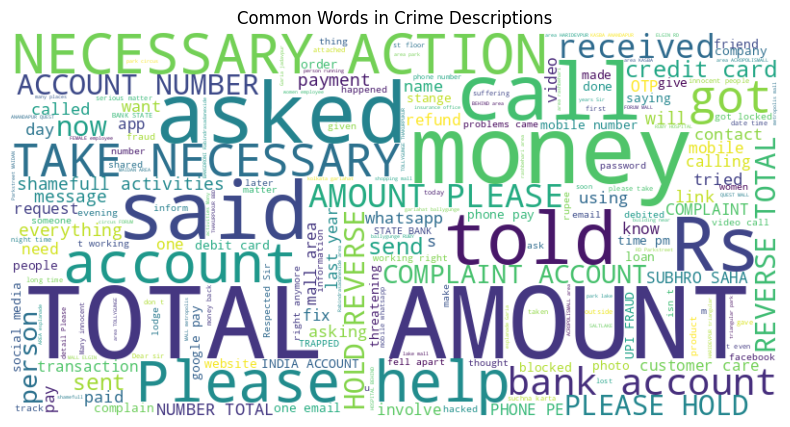

In [6]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Crime Descriptions')
plt.show()

<Figure size 1200x800 with 0 Axes>

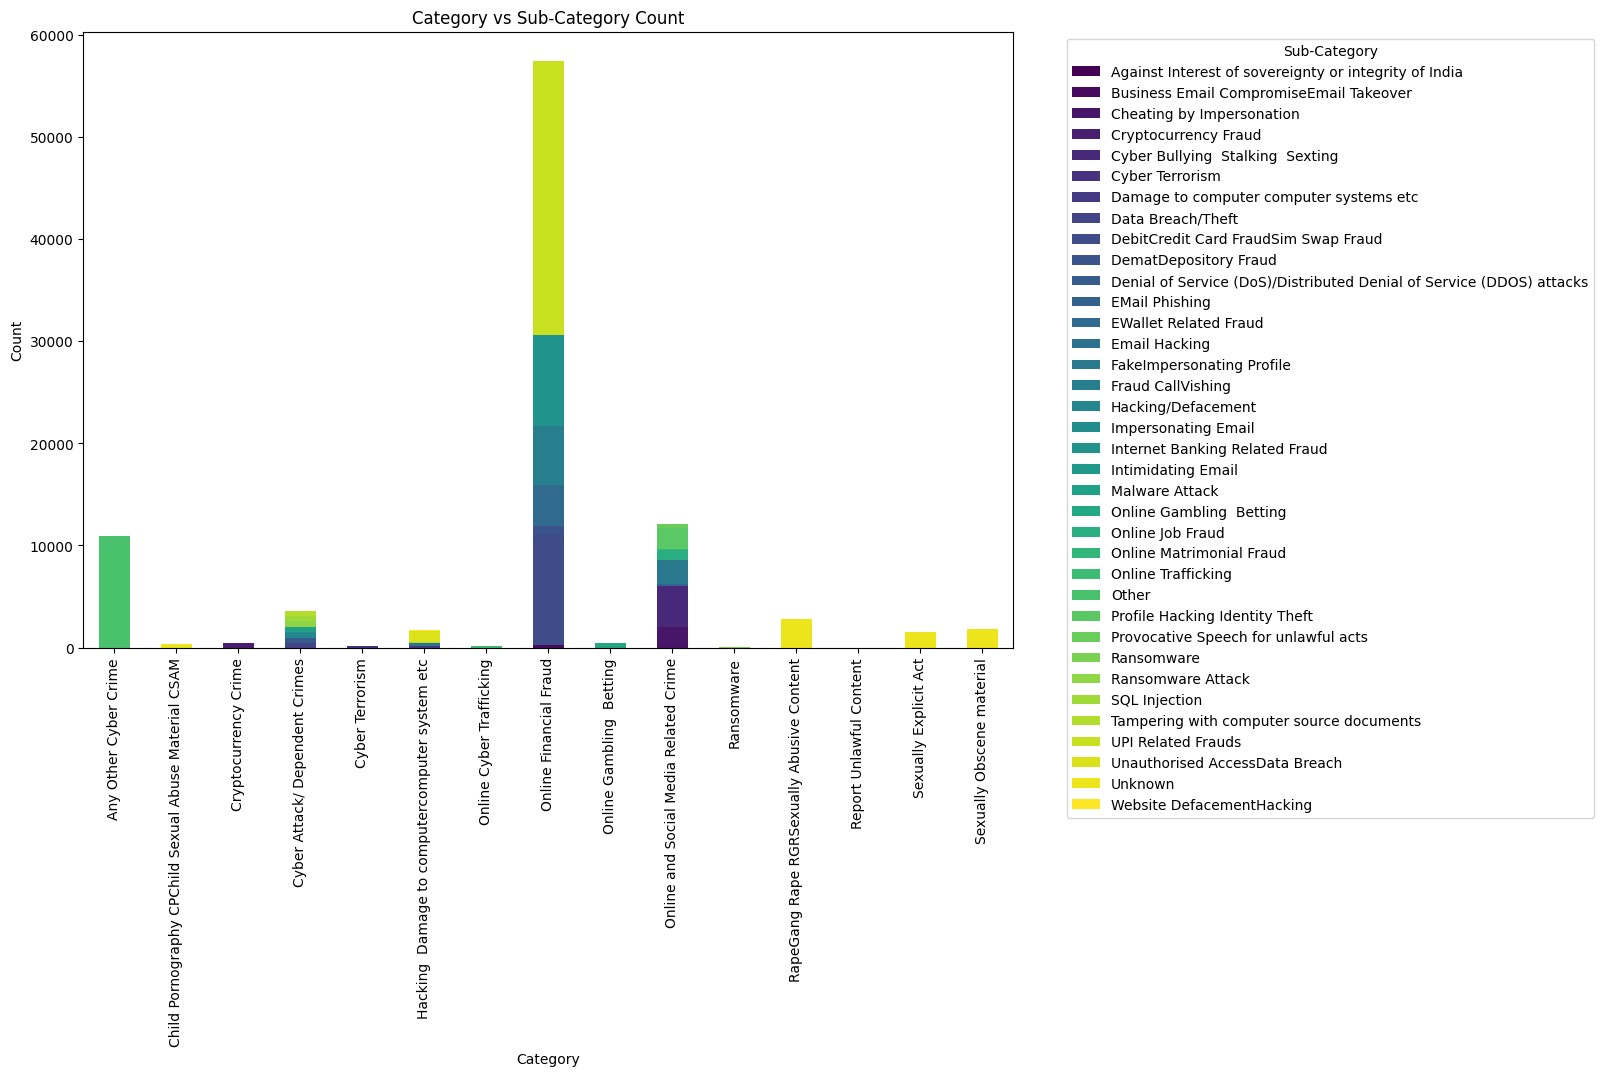

In [7]:
plt.figure(figsize=(12, 8))
category_subcategory_counts = data.groupby(['category', 'sub_category']).size().unstack()
category_subcategory_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Category vs Sub-Category Count')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Sub-Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

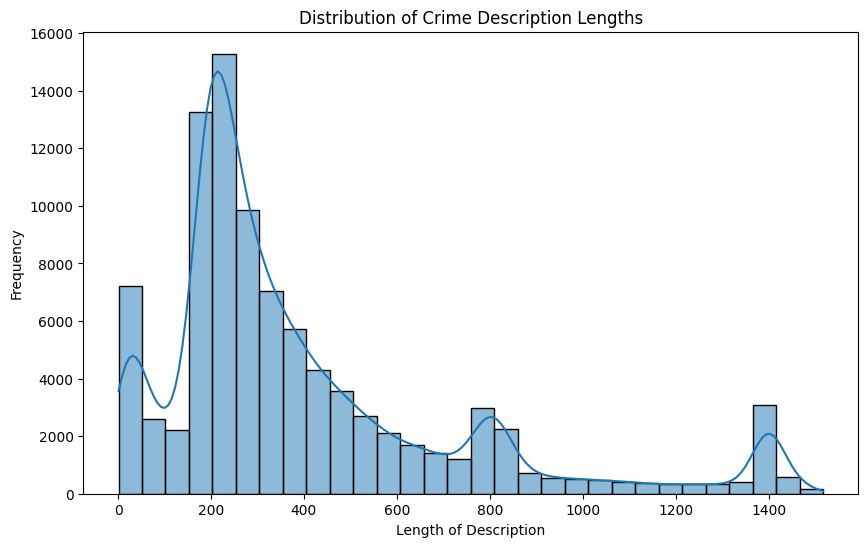

In [8]:
data['description_length'] = data['crimeaditionalinfo'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data['description_length'], bins=30, kde=True)
plt.title('Distribution of Crime Description Lengths')
plt.xlabel('Length of Description')
plt.ylabel('Frequency')
plt.show()

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(data['crimeaditionalinfo'])
keywords = vectorizer.get_feature_names_out()

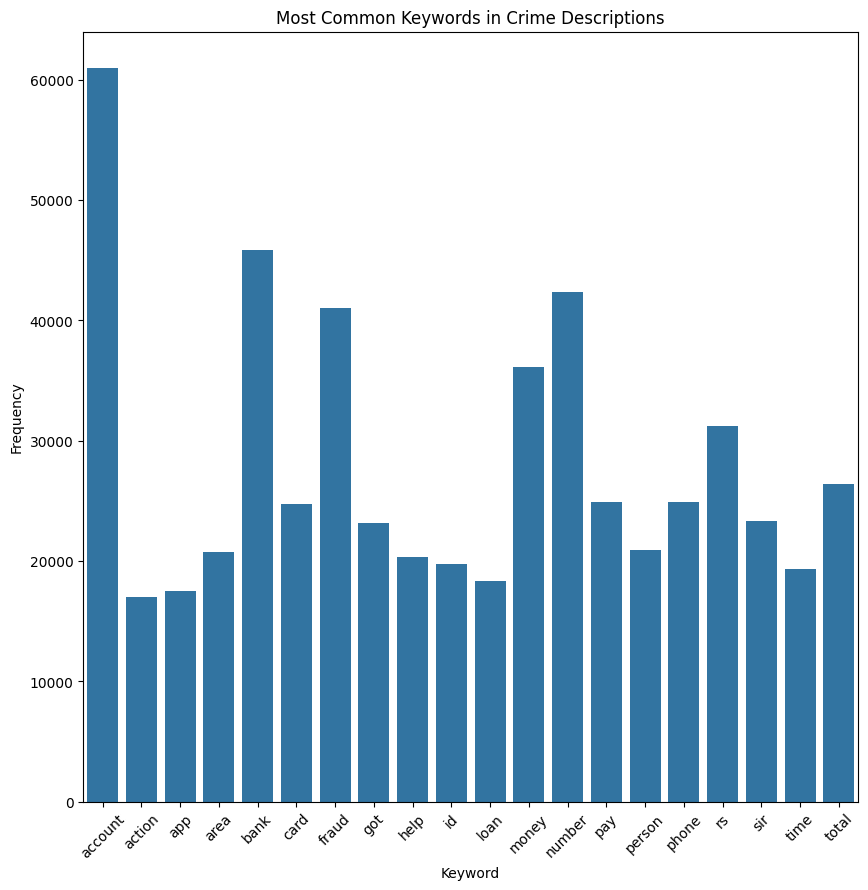

In [12]:
keyword_counts = np.asarray(X.sum(axis=0)).flatten()
plt.figure(figsize=(10, 10))
sns.barplot(x=keywords, y=keyword_counts)
plt.xticks(rotation=45)
plt.title('Most Common Keywords in Crime Descriptions')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.show()

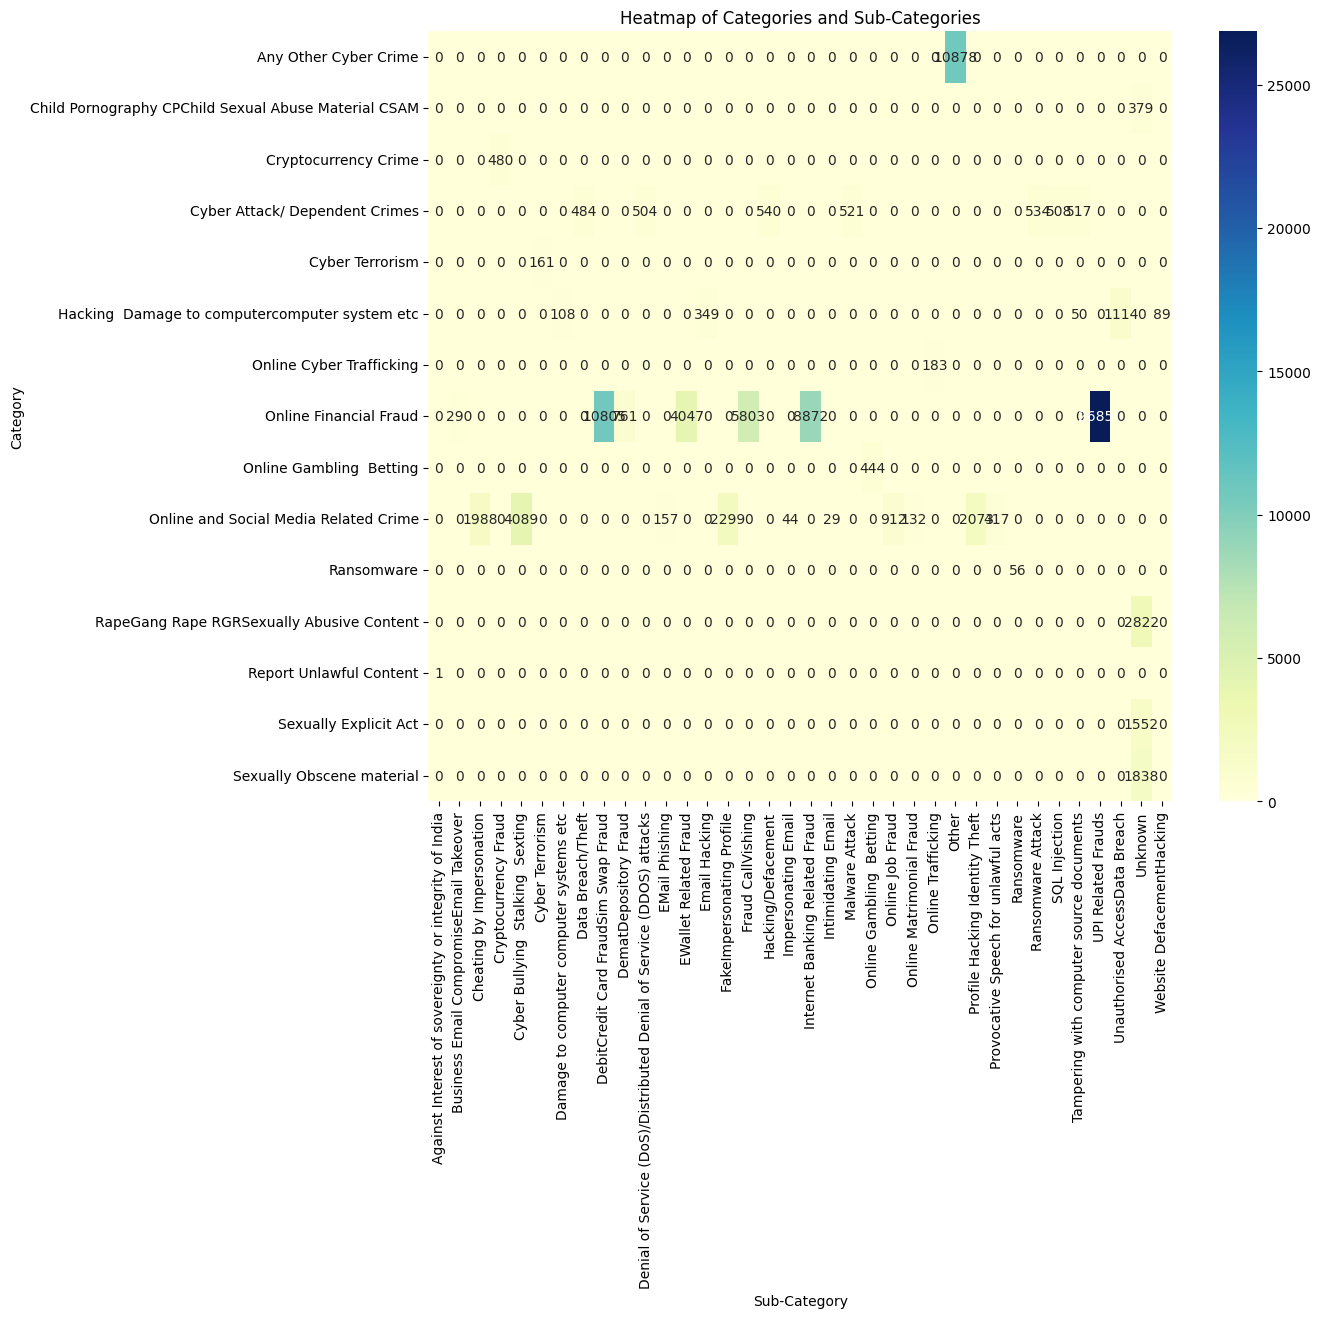

In [15]:
plt.figure(figsize=(12, 10))
heatmap_data = pd.crosstab(data['category'], data['sub_category'])
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Categories and Sub-Categories')
plt.xlabel('Sub-Category')
plt.ylabel('Category')
plt.show()